# "Target2 Saldos by ECB"
> "Capital flows between European Central Banks since 2001"

- toc:true- branch: master
- badges: true
- comments: true
- author: Claudia Chehade
- categories: [ECB, Capital Flow, Target2]

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [2]:
# hide
df_target2 = pd.read_csv('data\data.csv', skiprows=1)

In [3]:
# hide
df_target2.head()

,Unnamed: 0,TGB.M.4F.E.A094T.U2.EUR.A,TGB.M.4F.E.A094T.U2.EUR.E,TGB.M.AT.N.A094T.U2.EUR.A,TGB.M.AT.N.A094T.U2.EUR.E,TGB.M.BE.N.A094T.U2.EUR.A,TGB.M.BE.N.A094T.U2.EUR.E,TGB.M.CY.N.A094T.U2.EUR.A,TGB.M.CY.N.A094T.U2.EUR.E,TGB.M.DE.N.A094T.U2.EUR.A,...,TGB.M.NL.N.A094T.U2.EUR.A,TGB.M.NL.N.A094T.U2.EUR.E,TGB.M.PT.N.A094T.U2.EUR.A,TGB.M.PT.N.A094T.U2.EUR.E,TGB.M.SI.N.A094T.U2.EUR.A,TGB.M.SI.N.A094T.U2.EUR.E,TGB.M.SK.N.A094T.U2.EUR.A,TGB.M.SK.N.A094T.U2.EUR.E,TGB.M.U4.N.A094T.U2.EUR.A,TGB.M.U4.N.A094T.U2.EUR.E
0,NaN,"European Central Bank (ECB), ECB, Average of o...","European Central Bank (ECB), ECB, End of period","Austria, NCBs, Average of observations through...","Austria, NCBs, End of period","Belgium, NCBs, Average of observations through...","Belgium, NCBs, End of period","Cyprus, NCBs, Average of observations through ...","Cyprus, NCBs, End of period","Germany, NCBs, Average of observations through...",...,"Netherlands, NCBs, Average of observations thr...","Netherlands, NCBs, End of period","Portugal, NCBs, Average of observations throug...","Portugal, NCBs, End of period","Slovenia, NCBs, Average of observations throug...","Slovenia, NCBs, End of period","Slovakia, NCBs, Average of observations throug...","Slovakia, NCBs, End of period","Extra Euro area, NCBs, Average of observations...","Extra Euro area, NCBs, End of period"
1,Collection:,Average of observations through period (A),End of period (E),Average of observations through period (A),End of period (E),Average of observations through period (A),End of period (E),Average of observations through period (A),End of period (E),Average of observations through period (A),...,Average of observations through period (A),End of period (E),Average of observations through period (A),End of period (E),Average of observations through period (A),End of period (E),Average of observations through period (A),End of period (E),Average of observations through period (A),End of period (E)
2,Period\Unit:,[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],...,[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro],[Millions of Euro]
3,2020Jun,-204589.64,-259944.34,-36802.68,-36693.71,-63908.88,-63148.02,7322.72,7283.33,949991.05,...,82832.84,69724.14,-78335.14,-82713.80,7562.89,7542.19,14986.92,13655.19,4258.57,2594.67
4,2020May,-140045.08,-145451.48,-39910.46,-36636.43,-67779.00,-79644.78,7987.73,7575.22,938518.49,...,92684.40,77858.01,-71994.86,-72034.67,6901.04,7207.95,15671.42,14566.43,4397.25,2938.25


In [4]:
# hide
df_target2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 43 columns):
Unnamed: 0                   236 non-null object
TGB.M.4F.E.A094T.U2.EUR.A    237 non-null object
TGB.M.4F.E.A094T.U2.EUR.E    149 non-null object
TGB.M.AT.N.A094T.U2.EUR.A    237 non-null object
TGB.M.AT.N.A094T.U2.EUR.E    149 non-null object
TGB.M.BE.N.A094T.U2.EUR.A    237 non-null object
TGB.M.BE.N.A094T.U2.EUR.E    149 non-null object
TGB.M.CY.N.A094T.U2.EUR.A    237 non-null object
TGB.M.CY.N.A094T.U2.EUR.E    149 non-null object
TGB.M.DE.N.A094T.U2.EUR.A    237 non-null object
TGB.M.DE.N.A094T.U2.EUR.E    149 non-null object
TGB.M.EE.N.A094T.U2.EUR.A    237 non-null object
TGB.M.EE.N.A094T.U2.EUR.E    149 non-null object
TGB.M.ES.N.A094T.U2.EUR.A    237 non-null object
TGB.M.ES.N.A094T.U2.EUR.E    149 non-null object
TGB.M.FI.N.A094T.U2.EUR.A    237 non-null object
TGB.M.FI.N.A094T.U2.EUR.E    149 non-null object
TGB.M.FR.N.A094T.U2.EUR.A    237 non-null object
TGB.M.FR.N.A0

In [5]:
# hide
# collect all column names containing '(A)'
columns = list(df_target2.columns)
columns

['Unnamed: 0',
 'TGB.M.4F.E.A094T.U2.EUR.A',
 'TGB.M.4F.E.A094T.U2.EUR.E',
 'TGB.M.AT.N.A094T.U2.EUR.A',
 'TGB.M.AT.N.A094T.U2.EUR.E',
 'TGB.M.BE.N.A094T.U2.EUR.A',
 'TGB.M.BE.N.A094T.U2.EUR.E',
 'TGB.M.CY.N.A094T.U2.EUR.A',
 'TGB.M.CY.N.A094T.U2.EUR.E',
 'TGB.M.DE.N.A094T.U2.EUR.A',
 'TGB.M.DE.N.A094T.U2.EUR.E',
 'TGB.M.EE.N.A094T.U2.EUR.A',
 'TGB.M.EE.N.A094T.U2.EUR.E',
 'TGB.M.ES.N.A094T.U2.EUR.A',
 'TGB.M.ES.N.A094T.U2.EUR.E',
 'TGB.M.FI.N.A094T.U2.EUR.A',
 'TGB.M.FI.N.A094T.U2.EUR.E',
 'TGB.M.FR.N.A094T.U2.EUR.A',
 'TGB.M.FR.N.A094T.U2.EUR.E',
 'TGB.M.GR.N.A094T.U2.EUR.A',
 'TGB.M.GR.N.A094T.U2.EUR.E',
 'TGB.M.IE.N.A094T.U2.EUR.A',
 'TGB.M.IE.N.A094T.U2.EUR.E',
 'TGB.M.IT.N.A094T.U2.EUR.A',
 'TGB.M.IT.N.A094T.U2.EUR.E',
 'TGB.M.LT.N.A094T.U2.EUR.A',
 'TGB.M.LT.N.A094T.U2.EUR.E',
 'TGB.M.LU.N.A094T.U2.EUR.A',
 'TGB.M.LU.N.A094T.U2.EUR.E',
 'TGB.M.LV.N.A094T.U2.EUR.A',
 'TGB.M.LV.N.A094T.U2.EUR.E',
 'TGB.M.MT.N.A094T.U2.EUR.A',
 'TGB.M.MT.N.A094T.U2.EUR.E',
 'TGB.M.NL.N.A094T.U2.EUR

In [6]:
# hide
columns_e = [col for col in columns if col.endswith('.E')]
columns_e

['TGB.M.4F.E.A094T.U2.EUR.E',
 'TGB.M.AT.N.A094T.U2.EUR.E',
 'TGB.M.BE.N.A094T.U2.EUR.E',
 'TGB.M.CY.N.A094T.U2.EUR.E',
 'TGB.M.DE.N.A094T.U2.EUR.E',
 'TGB.M.EE.N.A094T.U2.EUR.E',
 'TGB.M.ES.N.A094T.U2.EUR.E',
 'TGB.M.FI.N.A094T.U2.EUR.E',
 'TGB.M.FR.N.A094T.U2.EUR.E',
 'TGB.M.GR.N.A094T.U2.EUR.E',
 'TGB.M.IE.N.A094T.U2.EUR.E',
 'TGB.M.IT.N.A094T.U2.EUR.E',
 'TGB.M.LT.N.A094T.U2.EUR.E',
 'TGB.M.LU.N.A094T.U2.EUR.E',
 'TGB.M.LV.N.A094T.U2.EUR.E',
 'TGB.M.MT.N.A094T.U2.EUR.E',
 'TGB.M.NL.N.A094T.U2.EUR.E',
 'TGB.M.PT.N.A094T.U2.EUR.E',
 'TGB.M.SI.N.A094T.U2.EUR.E',
 'TGB.M.SK.N.A094T.U2.EUR.E',
 'TGB.M.U4.N.A094T.U2.EUR.E']

In [7]:
# hide
# split into two dataframes with average and end of period
df_average = df_target2.copy()
df_average = df_average.drop(columns_e, axis=1)
df_average.drop(index=1, axis=0, inplace=True)
df_average.drop(index=2, axis=0, inplace=True)
df_average.set_index('Unnamed: 0', inplace=True)
df_average

,TGB.M.4F.E.A094T.U2.EUR.A,TGB.M.AT.N.A094T.U2.EUR.A,TGB.M.BE.N.A094T.U2.EUR.A,TGB.M.CY.N.A094T.U2.EUR.A,TGB.M.DE.N.A094T.U2.EUR.A,TGB.M.EE.N.A094T.U2.EUR.A,TGB.M.ES.N.A094T.U2.EUR.A,TGB.M.FI.N.A094T.U2.EUR.A,TGB.M.FR.N.A094T.U2.EUR.A,TGB.M.GR.N.A094T.U2.EUR.A,...,TGB.M.IT.N.A094T.U2.EUR.A,TGB.M.LT.N.A094T.U2.EUR.A,TGB.M.LU.N.A094T.U2.EUR.A,TGB.M.LV.N.A094T.U2.EUR.A,TGB.M.MT.N.A094T.U2.EUR.A,TGB.M.NL.N.A094T.U2.EUR.A,TGB.M.PT.N.A094T.U2.EUR.A,TGB.M.SI.N.A094T.U2.EUR.A,TGB.M.SK.N.A094T.U2.EUR.A,TGB.M.U4.N.A094T.U2.EUR.A
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
NaN,"European Central Bank (ECB), ECB, Average of o...","Austria, NCBs, Average of observations through...","Belgium, NCBs, Average of observations through...","Cyprus, NCBs, Average of observations through ...","Germany, NCBs, Average of observations through...","Estonia, NCBs, Average of observations through...","Spain, NCBs, Average of observations through p...","Finland, NCBs, Average of observations through...","France, NCBs, Average of observations through ...","Greece, NCBs, Average of observations through ...",...,"Italy, NCBs, Average of observations through p...","Lithuania, NCBs, Average of observations throu...","Luxembourg, NCBs, Average of observations thro...","Latvia, NCBs, Average of observations through ...","Malta, NCBs, Average of observations through p...","Netherlands, NCBs, Average of observations thr...","Portugal, NCBs, Average of observations throug...","Slovenia, NCBs, Average of observations throug...","Slovakia, NCBs, Average of observations throug...","Extra Euro area, NCBs, Average of observations..."
2020Jun,-204589.64,-36802.68,-63908.88,7322.72,949991.05,849.89,-455008.75,64359.27,5832.42,-62346.54,...,-526435.06,3601.22,232926.07,-3078.35,5501.36,82832.84,-78335.14,7562.89,14986.92,4258.57
2020May,-140045.08,-39910.46,-67779.00,7987.73,938518.49,698.81,-437351.66,68659.14,-73315.67,-51770.06,...,-525378.30,2678.32,221575.36,-2104.75,5335.95,92684.40,-71994.86,6901.04,15671.42,4397.25
2020Apr,-141005.55,-39535.21,-61206.92,8293.70,911528.46,624.41,-410801.66,60826.25,-95655.67,-41992.63,...,-501833.24,531.29,227436.80,-2356.73,5402.51,81910.45,-71090.95,5933.20,14915.56,4630.01
2020Mar,-216035.05,-38139.78,-40553.48,8248.98,887124.79,187.48,-377902.06,65242.28,-92730.30,-30609.21,...,-431657.25,224.90,216206.93,-3626.64,5335.56,60224.48,-74089.54,2868.95,13969.88,4107.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001May,-,-403.35,-7967.52,-,3683.30,-,24455.74,-1599.48,5083.87,-9141.22,...,-7360.04,-,-10284.48,-,-,3746.87,-4202.74,-,-,-
2001Apr,-,-907.25,-6280.00,-,-8959.05,-,24549.95,-1803.00,4843.25,-6471.95,...,4106.70,-,-9840.40,-,-,-60.75,-4111.05,-,-,-
2001Mar,-,-3193.05,-7038.00,-,-1796.82,-,23675.64,-1960.18,-1545.00,-4364.59,...,5488.41,-,-11612.23,-,-,37.14,-4637.36,-,-,-


In [8]:
# hide
df_average.columns = df_average.iloc[0]
df_average.drop(df_average.index[0], inplace=True)
df_average

nan,"European Central Bank (ECB), ECB, Average of observations through period","Austria, NCBs, Average of observations through period","Belgium, NCBs, Average of observations through period","Cyprus, NCBs, Average of observations through period","Germany, NCBs, Average of observations through period","Estonia, NCBs, Average of observations through period","Spain, NCBs, Average of observations through period","Finland, NCBs, Average of observations through period","France, NCBs, Average of observations through period","Greece, NCBs, Average of observations through period",...,"Italy, NCBs, Average of observations through period","Lithuania, NCBs, Average of observations through period","Luxembourg, NCBs, Average of observations through period","Latvia, NCBs, Average of observations through period","Malta, NCBs, Average of observations through period","Netherlands, NCBs, Average of observations through period","Portugal, NCBs, Average of observations through period","Slovenia, NCBs, Average of observations through period","Slovakia, NCBs, Average of observations through period","Extra Euro area, NCBs, Average of observations through period"
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2020Jun,-204589.64,-36802.68,-63908.88,7322.72,949991.05,849.89,-455008.75,64359.27,5832.42,-62346.54,...,-526435.06,3601.22,232926.07,-3078.35,5501.36,82832.84,-78335.14,7562.89,14986.92,4258.57
2020May,-140045.08,-39910.46,-67779.00,7987.73,938518.49,698.81,-437351.66,68659.14,-73315.67,-51770.06,...,-525378.30,2678.32,221575.36,-2104.75,5335.95,92684.40,-71994.86,6901.04,15671.42,4397.25
2020Apr,-141005.55,-39535.21,-61206.92,8293.70,911528.46,624.41,-410801.66,60826.25,-95655.67,-41992.63,...,-501833.24,531.29,227436.80,-2356.73,5402.51,81910.45,-71090.95,5933.20,14915.56,4630.01
2020Mar,-216035.05,-38139.78,-40553.48,8248.98,887124.79,187.48,-377902.06,65242.28,-92730.30,-30609.21,...,-431657.25,224.90,216206.93,-3626.64,5335.56,60224.48,-74089.54,2868.95,13969.88,4107.48
2020Feb,-252130.25,-40659.90,-38563.39,9393.73,804003.90,190.04,-373576.57,73128.73,-17946.67,-24467.17,...,-396863.33,-40.69,207962.74,-3674.79,5250.02,58333.34,-74062.22,3192.83,13776.77,3930.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001May,-,-403.35,-7967.52,-,3683.30,-,24455.74,-1599.48,5083.87,-9141.22,...,-7360.04,-,-10284.48,-,-,3746.87,-4202.74,-,-,-
2001Apr,-,-907.25,-6280.00,-,-8959.05,-,24549.95,-1803.00,4843.25,-6471.95,...,4106.70,-,-9840.40,-,-,-60.75,-4111.05,-,-,-
2001Mar,-,-3193.05,-7038.00,-,-1796.82,-,23675.64,-1960.18,-1545.00,-4364.59,...,5488.41,-,-11612.23,-,-,37.14,-4637.36,-,-,-


In [9]:
# hide
# shorten second line to country names
suffix = 'NCBs, Average of observations through period'
#df_average.columns = df_average.columns.apply(lambda x: x[:-len(suffix)] if x.endswith(suffix) else x)
df_average.rename(columns=lambda x: x[:-len(suffix)] if x.endswith(suffix) else x, inplace=True)
df_average

nan,"European Central Bank (ECB), ECB, Average of observations through period","Austria,","Belgium,","Cyprus,","Germany,","Estonia,","Spain,","Finland,","France,","Greece,",...,"Italy,","Lithuania,","Luxembourg,","Latvia,","Malta,","Netherlands,","Portugal,","Slovenia,","Slovakia,","Extra Euro area,"
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2020Jun,-204589.64,-36802.68,-63908.88,7322.72,949991.05,849.89,-455008.75,64359.27,5832.42,-62346.54,...,-526435.06,3601.22,232926.07,-3078.35,5501.36,82832.84,-78335.14,7562.89,14986.92,4258.57
2020May,-140045.08,-39910.46,-67779.00,7987.73,938518.49,698.81,-437351.66,68659.14,-73315.67,-51770.06,...,-525378.30,2678.32,221575.36,-2104.75,5335.95,92684.40,-71994.86,6901.04,15671.42,4397.25
2020Apr,-141005.55,-39535.21,-61206.92,8293.70,911528.46,624.41,-410801.66,60826.25,-95655.67,-41992.63,...,-501833.24,531.29,227436.80,-2356.73,5402.51,81910.45,-71090.95,5933.20,14915.56,4630.01
2020Mar,-216035.05,-38139.78,-40553.48,8248.98,887124.79,187.48,-377902.06,65242.28,-92730.30,-30609.21,...,-431657.25,224.90,216206.93,-3626.64,5335.56,60224.48,-74089.54,2868.95,13969.88,4107.48
2020Feb,-252130.25,-40659.90,-38563.39,9393.73,804003.90,190.04,-373576.57,73128.73,-17946.67,-24467.17,...,-396863.33,-40.69,207962.74,-3674.79,5250.02,58333.34,-74062.22,3192.83,13776.77,3930.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001May,-,-403.35,-7967.52,-,3683.30,-,24455.74,-1599.48,5083.87,-9141.22,...,-7360.04,-,-10284.48,-,-,3746.87,-4202.74,-,-,-
2001Apr,-,-907.25,-6280.00,-,-8959.05,-,24549.95,-1803.00,4843.25,-6471.95,...,4106.70,-,-9840.40,-,-,-60.75,-4111.05,-,-,-
2001Mar,-,-3193.05,-7038.00,-,-1796.82,-,23675.64,-1960.18,-1545.00,-4364.59,...,5488.41,-,-11612.23,-,-,37.14,-4637.36,-,-,-


In [10]:
# hide
df_average.rename(columns={'European Central Bank (ECB), ECB, Average of observations through period': 'ECB'}, inplace=True)

In [11]:
df_average.columns

Index(['ECB', 'Austria, ', 'Belgium, ', 'Cyprus, ', 'Germany, ', 'Estonia, ',
       'Spain, ', 'Finland, ', 'France, ', 'Greece, ', 'Ireland, ', 'Italy, ',
       'Lithuania, ', 'Luxembourg, ', 'Latvia, ', 'Malta, ', 'Netherlands, ',
       'Portugal, ', 'Slovenia, ', 'Slovakia, ', 'Extra Euro area, '],
      dtype='object', name=nan)

In [12]:
# hide
# drop first line with indicator name, third line with collection name, fourth line with Units

df_average

nan,ECB,"Austria,","Belgium,","Cyprus,","Germany,","Estonia,","Spain,","Finland,","France,","Greece,",...,"Italy,","Lithuania,","Luxembourg,","Latvia,","Malta,","Netherlands,","Portugal,","Slovenia,","Slovakia,","Extra Euro area,"
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2020Jun,-204589.64,-36802.68,-63908.88,7322.72,949991.05,849.89,-455008.75,64359.27,5832.42,-62346.54,...,-526435.06,3601.22,232926.07,-3078.35,5501.36,82832.84,-78335.14,7562.89,14986.92,4258.57
2020May,-140045.08,-39910.46,-67779.00,7987.73,938518.49,698.81,-437351.66,68659.14,-73315.67,-51770.06,...,-525378.30,2678.32,221575.36,-2104.75,5335.95,92684.40,-71994.86,6901.04,15671.42,4397.25
2020Apr,-141005.55,-39535.21,-61206.92,8293.70,911528.46,624.41,-410801.66,60826.25,-95655.67,-41992.63,...,-501833.24,531.29,227436.80,-2356.73,5402.51,81910.45,-71090.95,5933.20,14915.56,4630.01
2020Mar,-216035.05,-38139.78,-40553.48,8248.98,887124.79,187.48,-377902.06,65242.28,-92730.30,-30609.21,...,-431657.25,224.90,216206.93,-3626.64,5335.56,60224.48,-74089.54,2868.95,13969.88,4107.48
2020Feb,-252130.25,-40659.90,-38563.39,9393.73,804003.90,190.04,-373576.57,73128.73,-17946.67,-24467.17,...,-396863.33,-40.69,207962.74,-3674.79,5250.02,58333.34,-74062.22,3192.83,13776.77,3930.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001May,-,-403.35,-7967.52,-,3683.30,-,24455.74,-1599.48,5083.87,-9141.22,...,-7360.04,-,-10284.48,-,-,3746.87,-4202.74,-,-,-
2001Apr,-,-907.25,-6280.00,-,-8959.05,-,24549.95,-1803.00,4843.25,-6471.95,...,4106.70,-,-9840.40,-,-,-60.75,-4111.05,-,-,-
2001Mar,-,-3193.05,-7038.00,-,-1796.82,-,23675.64,-1960.18,-1545.00,-4364.59,...,5488.41,-,-11612.23,-,-,37.14,-4637.36,-,-,-


In [13]:
# hide
def convert_month(date : str):
    # 2020Jun
    year = date[0:4]
    month = date[4:]
    datetime_object = datetime.datetime.strptime(month, "%b")
    month_number = datetime_object.month
    return f'{year}-{month_number}' if month_number > 9 else f'{year}-0{month_number}'
    

In [14]:
# hide
# change indices to numerical values
df_average = df_average.rename(index = lambda x: convert_month(x))
df_average

nan,ECB,"Austria,","Belgium,","Cyprus,","Germany,","Estonia,","Spain,","Finland,","France,","Greece,",...,"Italy,","Lithuania,","Luxembourg,","Latvia,","Malta,","Netherlands,","Portugal,","Slovenia,","Slovakia,","Extra Euro area,"
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2020-06,-204589.64,-36802.68,-63908.88,7322.72,949991.05,849.89,-455008.75,64359.27,5832.42,-62346.54,...,-526435.06,3601.22,232926.07,-3078.35,5501.36,82832.84,-78335.14,7562.89,14986.92,4258.57
2020-05,-140045.08,-39910.46,-67779.00,7987.73,938518.49,698.81,-437351.66,68659.14,-73315.67,-51770.06,...,-525378.30,2678.32,221575.36,-2104.75,5335.95,92684.40,-71994.86,6901.04,15671.42,4397.25
2020-04,-141005.55,-39535.21,-61206.92,8293.70,911528.46,624.41,-410801.66,60826.25,-95655.67,-41992.63,...,-501833.24,531.29,227436.80,-2356.73,5402.51,81910.45,-71090.95,5933.20,14915.56,4630.01
2020-03,-216035.05,-38139.78,-40553.48,8248.98,887124.79,187.48,-377902.06,65242.28,-92730.30,-30609.21,...,-431657.25,224.90,216206.93,-3626.64,5335.56,60224.48,-74089.54,2868.95,13969.88,4107.48
2020-02,-252130.25,-40659.90,-38563.39,9393.73,804003.90,190.04,-373576.57,73128.73,-17946.67,-24467.17,...,-396863.33,-40.69,207962.74,-3674.79,5250.02,58333.34,-74062.22,3192.83,13776.77,3930.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-05,-,-403.35,-7967.52,-,3683.30,-,24455.74,-1599.48,5083.87,-9141.22,...,-7360.04,-,-10284.48,-,-,3746.87,-4202.74,-,-,-
2001-04,-,-907.25,-6280.00,-,-8959.05,-,24549.95,-1803.00,4843.25,-6471.95,...,4106.70,-,-9840.40,-,-,-60.75,-4111.05,-,-,-
2001-03,-,-3193.05,-7038.00,-,-1796.82,-,23675.64,-1960.18,-1545.00,-4364.59,...,5488.41,-,-11612.23,-,-,37.14,-4637.36,-,-,-


In [15]:
# hide
df_average.replace(to_replace='-', value='0', inplace=True)

In [16]:
# hide
# convert objects to floats
df_average = df_average.astype(float)

In [17]:
# hide
df_average.describe()

nan,ECB,"Austria,","Belgium,","Cyprus,","Germany,","Estonia,","Spain,","Finland,","France,","Greece,",...,"Italy,","Lithuania,","Luxembourg,","Latvia,","Malta,","Netherlands,","Portugal,","Slovenia,","Slovakia,","Extra Euro area,"
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,...,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.00000
mean,-43307.383077,-25193.911709,-24388.524701,-886.299957,353088.647906,350.117991,-140286.379402,20999.679017,-24150.897906,-43670.895342,...,-131813.865000,-564.306966,78240.820342,-1417.830000,421.920085,44094.021282,-40757.443718,-961.274316,-700.358803,2207.24688
std,99356.408824,14823.254806,19614.533170,5399.430759,339345.256408,550.780643,167227.884191,26533.991041,35702.315566,33985.477204,...,188725.519785,1490.126020,77411.562334,2310.476674,1753.979012,50778.217320,29512.818360,2178.887918,7218.808096,4197.67370
min,-256026.040000,-47325.320000,-98312.130000,-11378.540000,-27310.000000,-472.480000,-455008.750000,-3863.290000,-134321.440000,-108471.800000,...,-526435.060000,-6149.790000,-14785.480000,-7207.960000,-1738.980000,-13360.710000,-84496.790000,-5780.840000,-15635.110000,0.00000
25%,-56471.250000,-37516.882500,-36737.527500,-6008.372500,10182.552500,0.000000,-298223.502500,-1193.942500,-52343.142500,-73524.062500,...,-262135.247500,0.000000,5913.017500,-2506.980000,-645.922500,1254.460000,-66415.022500,-2943.485000,-3408.570000,0.00000
50%,0.000000,-29273.875000,-17672.320000,0.000000,286279.595000,0.000000,-48817.930000,5820.265000,-18936.525000,-32002.345000,...,-1845.745000,0.000000,69349.730000,0.000000,0.000000,17053.295000,-55026.530000,0.000000,0.000000,858.25000
75%,0.000000,-15921.187500,-10333.677500,1401.217500,636635.480000,670.902500,19983.620000,49519.447500,8581.115000,-12778.590000,...,22785.787500,0.000000,128999.812500,0.000000,152.447500,87160.777500,-10577.107500,0.000000,1423.242500,2727.54750
max,236960.640000,4086.610000,7687.790000,9949.510000,949991.050000,2079.150000,40955.410000,73128.730000,31598.520000,422.000000,...,73094.400000,3601.220000,232926.070000,126.900000,5501.360000,181436.140000,-4111.050000,7562.890000,15671.420000,23177.97000


In [18]:
# hide
df_average.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 2020-06 to 2001-01
Data columns (total 21 columns):
ECB                  234 non-null float64
Austria,             234 non-null float64
Belgium,             234 non-null float64
Cyprus,              234 non-null float64
Germany,             234 non-null float64
Estonia,             234 non-null float64
Spain,               234 non-null float64
Finland,             234 non-null float64
France,              234 non-null float64
Greece,              234 non-null float64
Ireland,             234 non-null float64
Italy,               234 non-null float64
Lithuania,           234 non-null float64
Luxembourg,          234 non-null float64
Latvia,              234 non-null float64
Malta,               234 non-null float64
Netherlands,         234 non-null float64
Portugal,            234 non-null float64
Slovenia,            234 non-null float64
Slovakia,            234 non-null float64
Extra Euro area,     234 non-null float64
dtypes: 

In [19]:
# hide
df_average.sort_index(axis=0, ascending=True, inplace=True)
df_average

nan,ECB,"Austria,","Belgium,","Cyprus,","Germany,","Estonia,","Spain,","Finland,","France,","Greece,",...,"Italy,","Lithuania,","Luxembourg,","Latvia,","Malta,","Netherlands,","Portugal,","Slovenia,","Slovakia,","Extra Euro area,"
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2001-01,0.00,-4676.05,-6492.05,0.00,-11567.59,0.00,40955.41,-1172.95,-1552.27,-1121.91,...,-7614.55,0.00,-12389.86,0.00,0.00,2025.45,-5172.27,0.00,0.00,0.00
2001-02,0.00,-4453.90,-6924.85,0.00,-2932.05,0.00,32958.50,-2030.95,-225.85,-1374.70,...,-2692.00,0.00,-12185.80,0.00,0.00,-1638.65,-5403.90,0.00,0.00,0.00
2001-03,0.00,-3193.05,-7038.00,0.00,-1796.82,0.00,23675.64,-1960.18,-1545.00,-4364.59,...,5488.41,0.00,-11612.23,0.00,0.00,37.14,-4637.36,0.00,0.00,0.00
2001-04,0.00,-907.25,-6280.00,0.00,-8959.05,0.00,24549.95,-1803.00,4843.25,-6471.95,...,4106.70,0.00,-9840.40,0.00,0.00,-60.75,-4111.05,0.00,0.00,0.00
2001-05,0.00,-403.35,-7967.52,0.00,3683.30,0.00,24455.74,-1599.48,5083.87,-9141.22,...,-7360.04,0.00,-10284.48,0.00,0.00,3746.87,-4202.74,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02,-252130.25,-40659.90,-38563.39,9393.73,804003.90,190.04,-373576.57,73128.73,-17946.67,-24467.17,...,-396863.33,-40.69,207962.74,-3674.79,5250.02,58333.34,-74062.22,3192.83,13776.77,3930.57
2020-03,-216035.05,-38139.78,-40553.48,8248.98,887124.79,187.48,-377902.06,65242.28,-92730.30,-30609.21,...,-431657.25,224.90,216206.93,-3626.64,5335.56,60224.48,-74089.54,2868.95,13969.88,4107.48
2020-04,-141005.55,-39535.21,-61206.92,8293.70,911528.46,624.41,-410801.66,60826.25,-95655.67,-41992.63,...,-501833.24,531.29,227436.80,-2356.73,5402.51,81910.45,-71090.95,5933.20,14915.56,4630.01


In [20]:
# hide
df_average.index.name

'Unnamed: 0'

In [21]:
# hide
df_average.index.name = 'Year / Months'
df_average

nan,ECB,"Austria,","Belgium,","Cyprus,","Germany,","Estonia,","Spain,","Finland,","France,","Greece,",...,"Italy,","Lithuania,","Luxembourg,","Latvia,","Malta,","Netherlands,","Portugal,","Slovenia,","Slovakia,","Extra Euro area,"
Year / Months,,,,,,,,,,,,,,,,,,,,,
2001-01,0.00,-4676.05,-6492.05,0.00,-11567.59,0.00,40955.41,-1172.95,-1552.27,-1121.91,...,-7614.55,0.00,-12389.86,0.00,0.00,2025.45,-5172.27,0.00,0.00,0.00
2001-02,0.00,-4453.90,-6924.85,0.00,-2932.05,0.00,32958.50,-2030.95,-225.85,-1374.70,...,-2692.00,0.00,-12185.80,0.00,0.00,-1638.65,-5403.90,0.00,0.00,0.00
2001-03,0.00,-3193.05,-7038.00,0.00,-1796.82,0.00,23675.64,-1960.18,-1545.00,-4364.59,...,5488.41,0.00,-11612.23,0.00,0.00,37.14,-4637.36,0.00,0.00,0.00
2001-04,0.00,-907.25,-6280.00,0.00,-8959.05,0.00,24549.95,-1803.00,4843.25,-6471.95,...,4106.70,0.00,-9840.40,0.00,0.00,-60.75,-4111.05,0.00,0.00,0.00
2001-05,0.00,-403.35,-7967.52,0.00,3683.30,0.00,24455.74,-1599.48,5083.87,-9141.22,...,-7360.04,0.00,-10284.48,0.00,0.00,3746.87,-4202.74,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02,-252130.25,-40659.90,-38563.39,9393.73,804003.90,190.04,-373576.57,73128.73,-17946.67,-24467.17,...,-396863.33,-40.69,207962.74,-3674.79,5250.02,58333.34,-74062.22,3192.83,13776.77,3930.57
2020-03,-216035.05,-38139.78,-40553.48,8248.98,887124.79,187.48,-377902.06,65242.28,-92730.30,-30609.21,...,-431657.25,224.90,216206.93,-3626.64,5335.56,60224.48,-74089.54,2868.95,13969.88,4107.48
2020-04,-141005.55,-39535.21,-61206.92,8293.70,911528.46,624.41,-410801.66,60826.25,-95655.67,-41992.63,...,-501833.24,531.29,227436.80,-2356.73,5402.51,81910.45,-71090.95,5933.20,14915.56,4630.01


In [22]:
# hide
df_average.columns

Index(['ECB', 'Austria, ', 'Belgium, ', 'Cyprus, ', 'Germany, ', 'Estonia, ',
       'Spain, ', 'Finland, ', 'France, ', 'Greece, ', 'Ireland, ', 'Italy, ',
       'Lithuania, ', 'Luxembourg, ', 'Latvia, ', 'Malta, ', 'Netherlands, ',
       'Portugal, ', 'Slovenia, ', 'Slovakia, ', 'Extra Euro area, '],
      dtype='object', name=nan)

<Figure size 432x288 with 0 Axes>

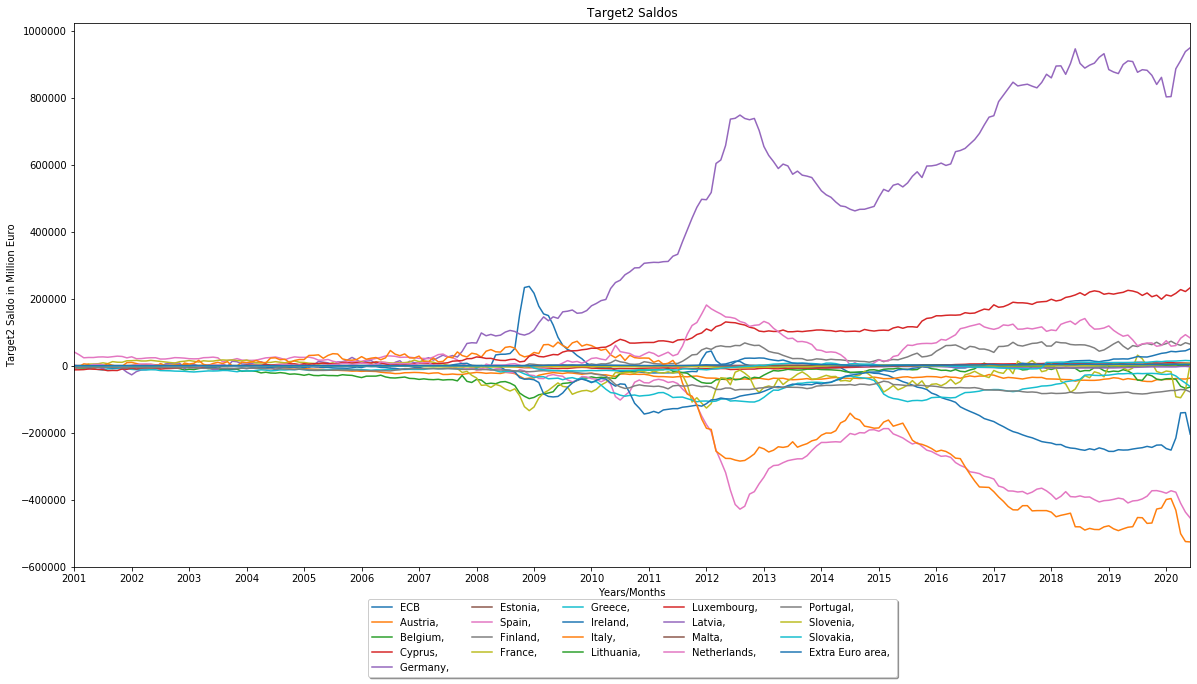

In [30]:
# hide
years = np.arange(2001, 2021, 1);
plt.figure();
ax = df_average.plot(kind='line', figsize=(20,10), title='Target2 Saldos');
plt.xlabel('Years/Months');
plt.ylabel('Target2 Saldo in Million Euro');
plt.xticks(np.arange(0, df_average.shape[0], step=12), years);
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

# Target2 Monthly Average

In [24]:
# hide
source = df_average
source = source.reset_index().melt('Year / Months', var_name='Central Banks', value_name='Target2 Saldo')

In [25]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Year / Months'], empty='none')

# The basic line
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    x='Year / Months:T',
    y='Target2 Saldo:Q',
    color='Central Banks:N'
)

In [26]:
# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='Year / Months:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 
                       'Target2 Saldo:Q',
                       alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='Year / Months:T',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=300
)

alt.LayerChart(...)

# Target2 Monthly Average since 2001

In [27]:
# hide
source = df_average
source = source.reset_index().melt('Year / Months', var_name='Central Banks', value_name='Target2 Saldo')

In [28]:
selection = alt.selection_multi(fields=['Central Banks'], bind='legend')

In [29]:
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    x='Year / Months:T',
    y='Target2 Saldo:Q',
    color='Central Banks:N',
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    tooltip = [alt.Tooltip('Target2 Saldo'),
              ]
).add_selection(
    selection
).interactive().properties(
    width=800, height=300
)
line

alt.Chart(...)